<a href="https://colab.research.google.com/github/cyrus-rule/Data-Science-/blob/main/CyruRuleU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "preliz[full,notebook]"
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0


You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 3 Project: The Right Likelihood for the Job

**Task**:

Two parts:

1. Propose a data set that's compatible with a single variable likelihood from pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one piror, and NONE of your priors can be a beta distribtuion
- Your likelihood CANNOT be a Bernoulli distribution nor a Binomial distribution.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit3NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.


**Project Start!!**

In the NBA, there is often some amount of hype surrounding the last team to have an undefeated record in a given season. I wanted to predict the greatest number of win before taking a single loss a team will achieve in an NBA season.

First, lets look at the data

In [2]:
url_undefeatedStreak = 'https://raw.githubusercontent.com/cyrus-rule/Data-Science-/main/UndefeatedStreak.csv'
data_undefeatedStreak = pd.read_csv(url_undefeatedStreak)
data_undefeatedStreak

,Wins
0,5
1,9
2,4
3,4
4,5
...,...
71,4
72,4
73,3
74,4


Now let's add a histogram and get some additional information about this data.

,Wins
count,76.000000
mean,6.828947
std,3.645593
min,2.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,24.000000


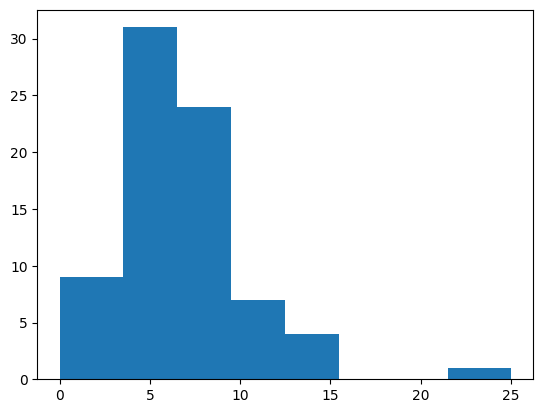

In [3]:
plt.hist(data_undefeatedStreak, [0,3.5,6.5,9.5,12.5,15.5,18.5,21.5,25])
data_undefeatedStreak.describe()

Interesting, we have a mean at 6.8 wins and a median of 6, and 75% of values lie between 4 & 8. The values seem to skew right with one major outlier a 24 wins before a single loss (2016 Warriors 💀). Without the outlier the values seem to center around 5 or 6, and asymetrically so. (skew right?)

PS: I specified the values I did for the bins of the histogram to ensure that the first bin started at 0 even though the smallest data point is 2.

I think that I will want to pick a Weibull distribution. Weibull Distributions are ideal for modeling "time to failure" situations, and I think my situation fits that well. We have a league full of teams playing games against each other, and they all fail individually at some point (failure = losing a game). When the last one fails, we say the whole system has failed.

Ok, so now lets think about the parameters. The Weibull distribution has two parameters, α and β. alpha indicates the change in the rate of failure over time. α > 1 means failure becomes more likely over time, 1 means the rate stays the same, and < 1 means failure becomes less likely over time. Because as time passes, there are going to be fewer teams left and able to continue a streak, so while its pretty unlikely for the system as a whole to fail after 2 or 3 games because there are several teams that would have to simultaneously fail for that to happen, at 7 or 8 games, there is likely only one team left to carry on the streak.

Beause of this, I estimate that α will be a little greater than 1.

I'm gonna use a truncated normal to represent that (centered around α = 1.5)

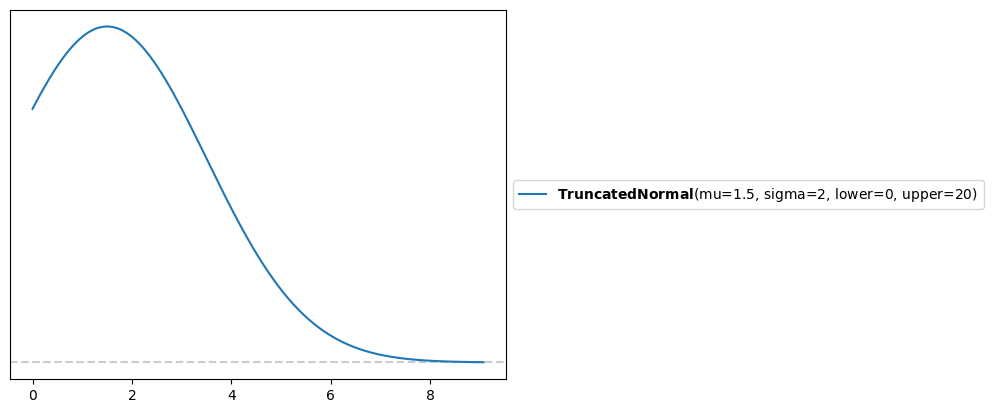

In [4]:
α = pz.TruncatedNormal(1.5, 2, 0, 20).plot_pdf()

This prior represents my hunch that α is a little more than 1, but with all (positive) values plausible except for really large ones. I don't think very high values of α ( > 8ish ) would imply a failure rate that increases at a rate I don't think is plausible (I don't have evidence for this but we'll see how it goes).

The parameter β acts as a scale parameter, the higher it is, the greater the range of plausible values in the distribution. I don't have a lot of intuition for how this variable will affect the shape of the distribution (not at all?), but I was able to find on the interwebs that the mean of a weibull distribution is

$$\beta \Gamma(1+\frac{1}{\alpha})$$

Since the mean of our data was around 6.8, and we ostensibly would want our distribution to match that, we should select β values that will give us appropriate means for the α values we expect. Since we anticipate α to more than likely be between 0 and 8, I'll select β values between 0 and 6.5. (These are just rough numbers based on a plot of α and β values that give us the mean that we should be somewhat near)

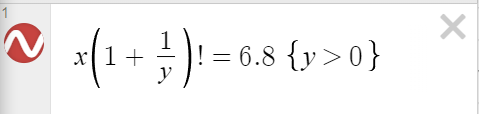

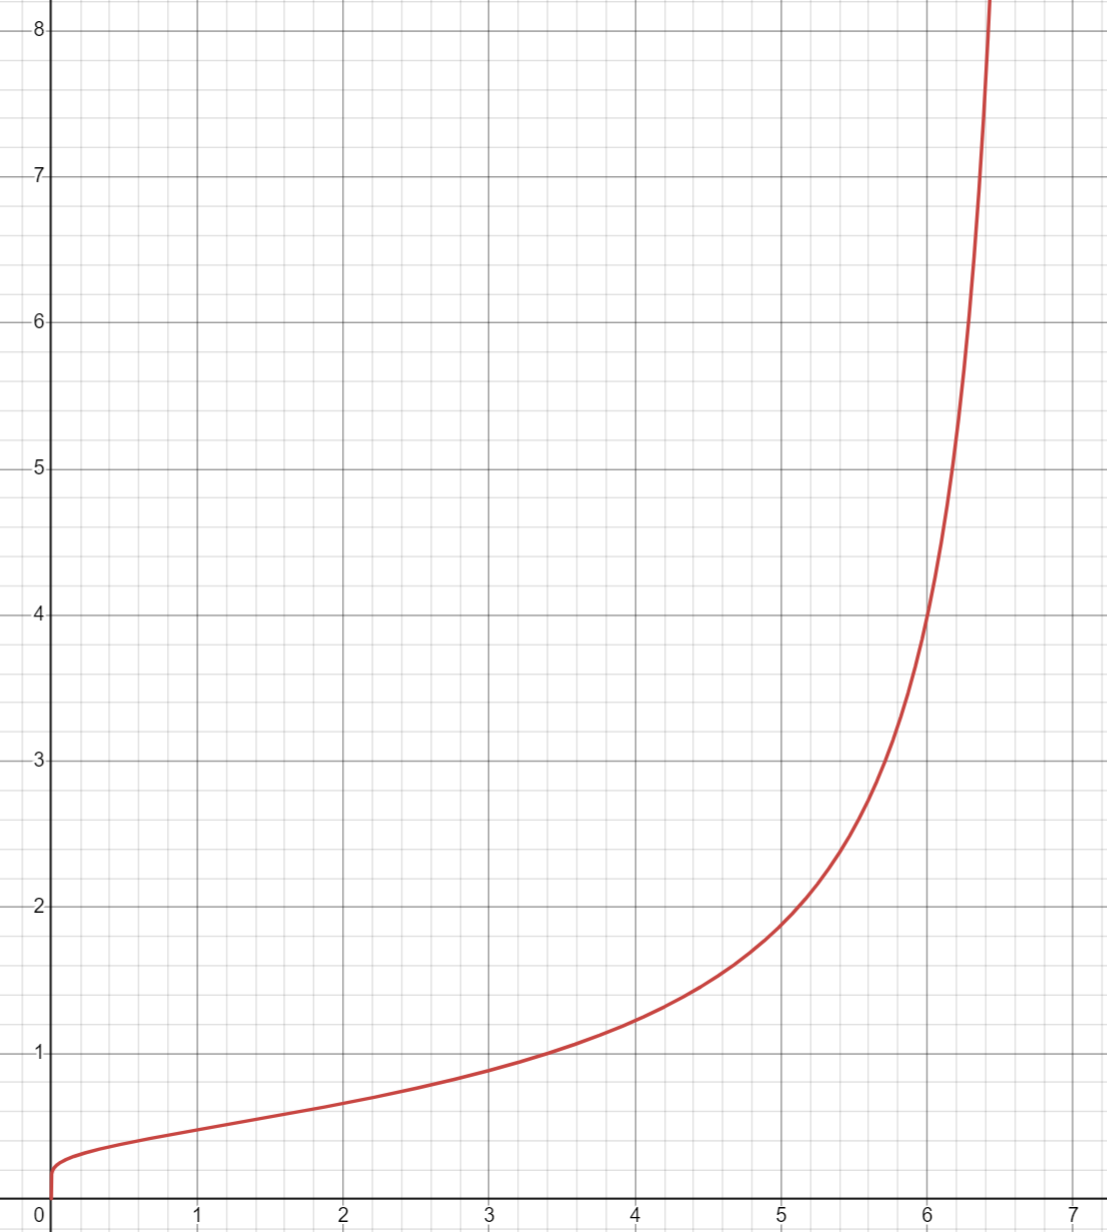

Within these bounds, I really have no idea what to expect because the β values that are appropriate seem to depend on α, so I'll leave it as a uniform distribution.

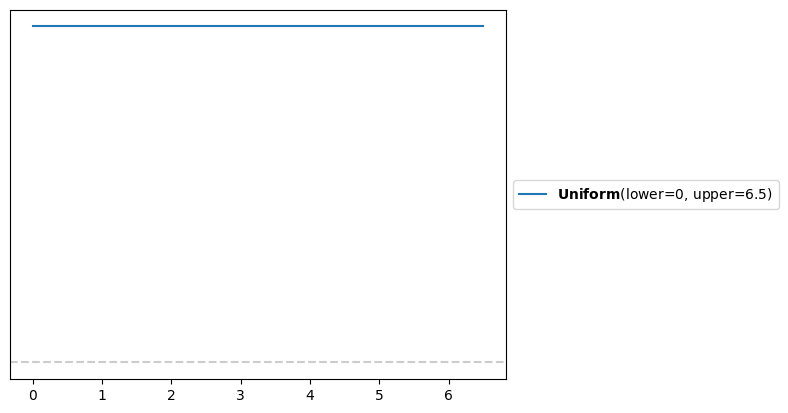

In [5]:
β = pz.Uniform(0,6.5).plot_pdf()

Ok lets get the model running with these priors!

In [6]:
with pm.Model() as model_undefeatedStreak:
    α = pm.TruncatedNormal('α', mu=1.5, sigma=2, lower=0, upper=20) #I'll use an upper bound of 20 a lot because its far enough away that I'd be shocked if it messed with the outcome (10*sigma)
    β = pm.Uniform('β', lower=0, upper=6.5)
    W = pm.Weibull('W', alpha=α, beta=β, observed=data_undefeatedStreak)
    idata_undefeatedStreak = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'β'}>],
      dtype=object)

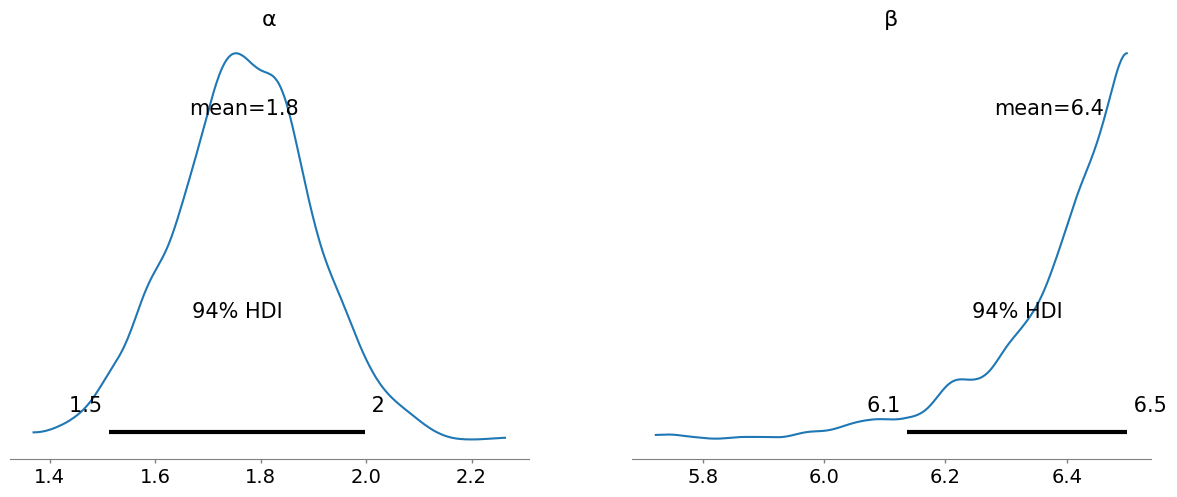

In [7]:
az.plot_posterior(idata_undefeatedStreak)

In [8]:
pm.sample_posterior_predictive(idata_undefeatedStreak, model=model_undefeatedStreak, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

array([[<Axes: >, None],
       [<Axes: xlabel='α', ylabel='β'>, <Axes: >]], dtype=object)

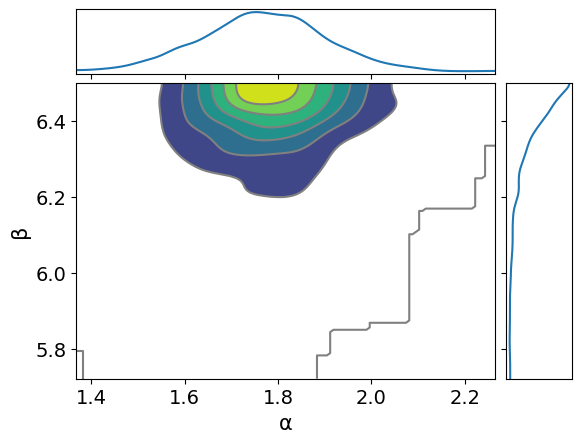

In [9]:
az.plot_pair(idata_undefeatedStreak, kind='kde', marginals=True)

<Axes: xlabel='W'>

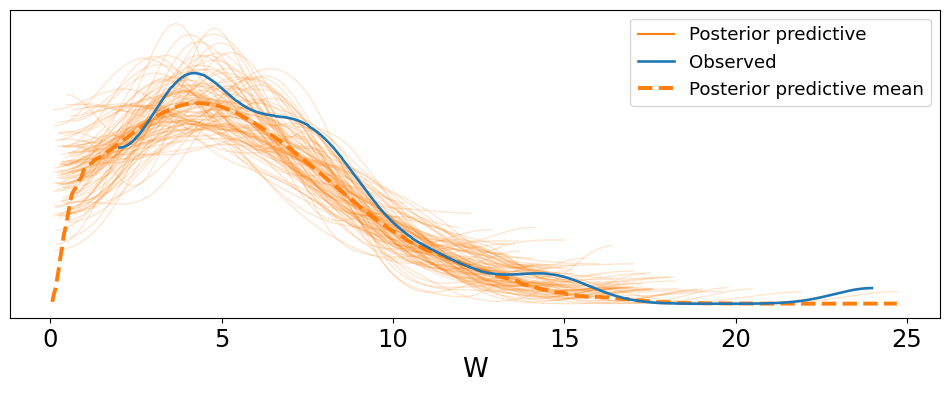

In [10]:
az.plot_ppc(idata_undefeatedStreak, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Huh, so this is interesting. Overall, I would say this predictive mean is a decent model of our situation, especially the long tail on the right side. You can even see some of the predictive models have outliers and spikes on the right just like exist in reality. This gives me some confidence that I have the likelihood on the far right about correct.

Something interesting is the way our beta values turned out. our mean beta value was 6.4 despite the range only going up to 6.5, and looking at the graph, 6.5 was the mode as well. This makes me think that I should allow for higher values for beta and see what happens. This is really odd because I was expecting beta values closer to 3 or 4. The model also doesn't predict the complete lack of values of 1 or 2 in the data, but I would chalk that up to the weirdness of the dataset. In the time of failure situations that Weibull is meant for, it is possible (if unlikely) that this system would fail almost immediately, while it is literally impossible for every nba team to lose at least 1 of their first two games. My model also doesn't have as much weight in the 4-10 section as we observe in the data, but the might be because of the extra weight in the "less that two wins" area.

I'm gonna try running this again but with a broader range of beta values and see what changes

In [11]:
with pm.Model() as model_undefeatedStreak:
    α = pm.TruncatedNormal('α', mu=1.5, sigma=2, lower=0, upper=20)
    β = pm.Uniform('β', lower=0, upper=10) #New upper bound of beta
    W = pm.Weibull('W', alpha=α, beta=β, observed=data_undefeatedStreak)
    idata_undefeatedStreak = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'β'}>],
      dtype=object)

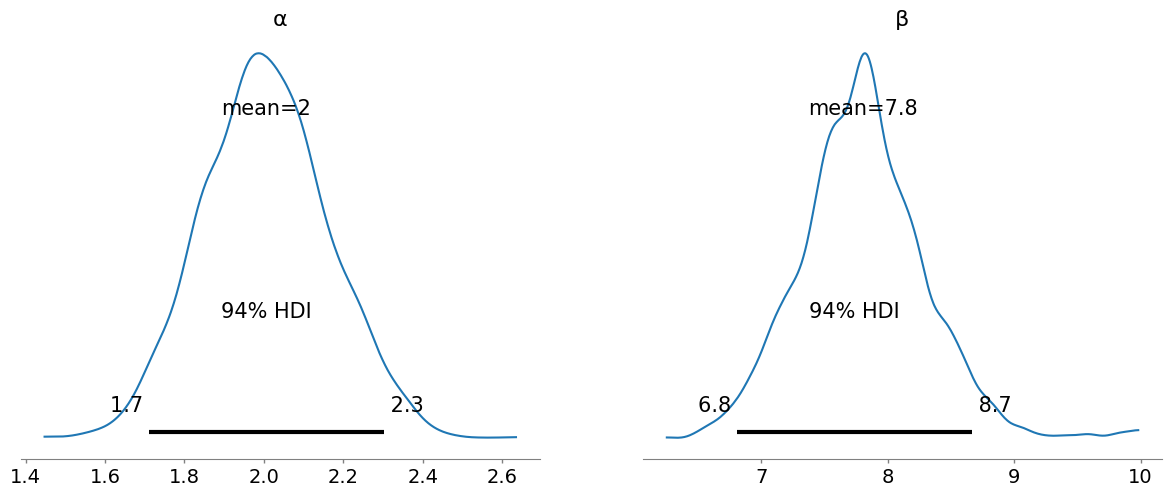

In [12]:
az.plot_posterior(idata_undefeatedStreak)

array([[<Axes: >, None],
       [<Axes: xlabel='α', ylabel='β'>, <Axes: >]], dtype=object)

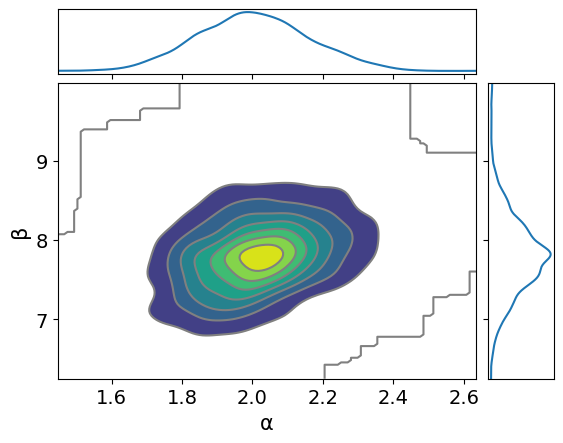

In [13]:
az.plot_pair(idata_undefeatedStreak, kind='kde', marginals=True)

In [14]:
pm.sample_posterior_predictive(idata_undefeatedStreak, model=model_undefeatedStreak, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='W'>

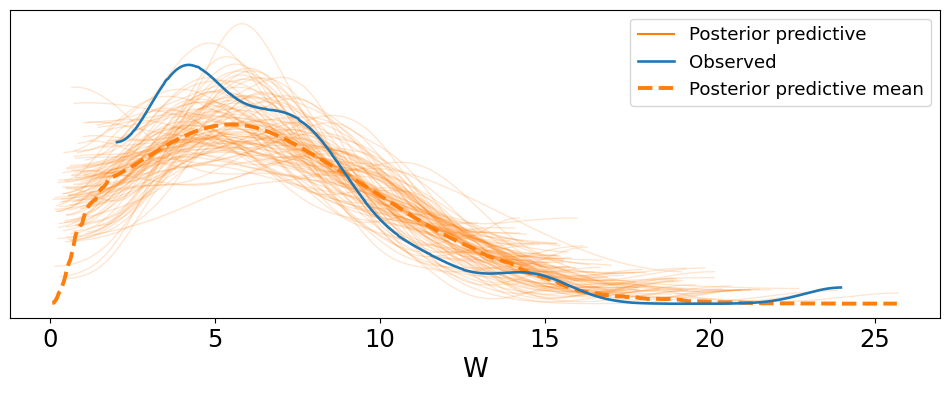

In [15]:
az.plot_ppc(idata_undefeatedStreak, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Ok so that didn't really help.
Ok, so minor (major) correction


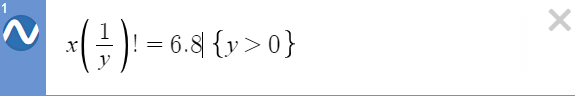

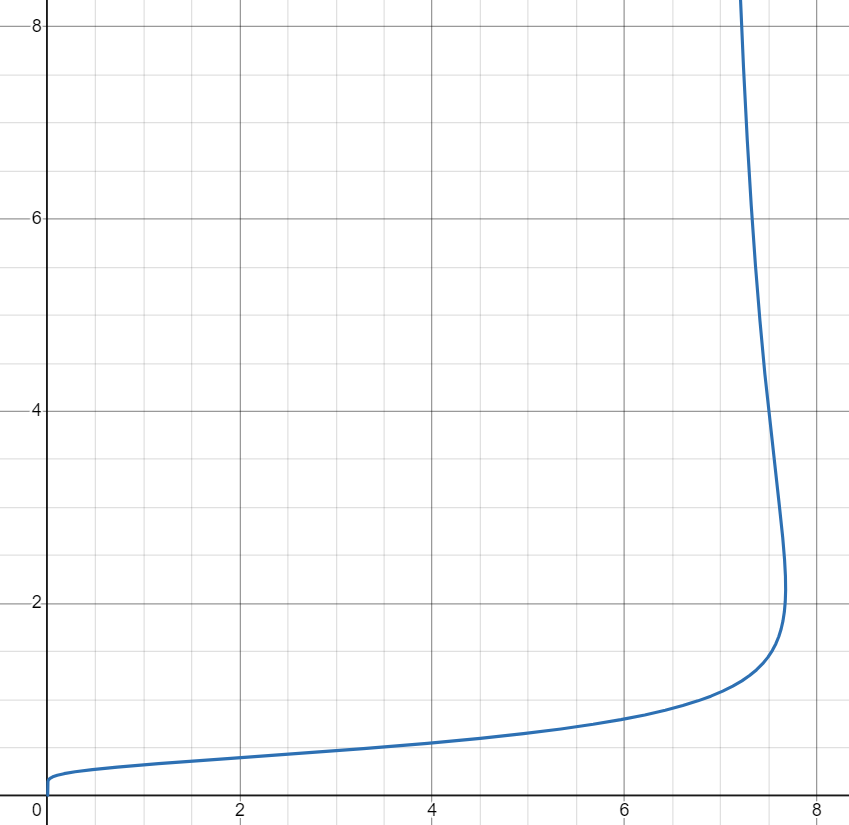

When I used the graph to predict good values for b, I actually messed up my formula. For positive integers, Γ(x) = (x-1)!, so I should have used the equation above instead of the original. With this adjustment, we see that for the alpha values around 1.5 - 2 that I was anticipating, beta values around 7.5 - 8 actually make perfect sense as far as getting the means to match up.

Beyond that, there are a lot of other problems with my setup. Firstly, my data sucks. Included is both modern seasons (where there are thirty teams) and the 1957-58 season in which there were 8 teams. I think these dark age teams are skewing my data.

Also, I think my assumption about alpha was kind of baseless. I assumed that since the number of teams left at a given point in the season would go down, the failure rate should go up. However, the more I looked at my data, the more I saw that in the game where the last team left loses, they are almost always the only undefeated team by that point. In other words, the situation I was worried about where two teams are both undefeated and lose at the same time is not very common.

Considering that, if we assume that when the system as a whole is anywhere near failing there is only one team left, it seems like we would actually want a decreasing failure rate (if one team is 4-0 and another team is 20-0, which one is more likely to lose their next game).

So, with this in mind, I'm going to go back and clean up my data by removing all seasons before the somewhat modern nba (I'm deciding that this happened at the NBA ABA merger in 1976). Let's reanalyze

In [16]:
url_undefeatedStreak = 'https://raw.githubusercontent.com/cyrus-rule/Data-Science-/main/UndefeatedStreak2.csv'
data_undefeatedStreak = pd.read_csv(url_undefeatedStreak)
data_undefeatedStreak

,Wins
0,5
1,9
2,4
3,4
4,5
5,7
6,4
7,6
8,24
9,6


,Wins
count,48.000000
mean,7.354167
std,3.715921
min,3.000000
25%,5.000000
50%,7.000000
75%,8.250000
max,24.000000


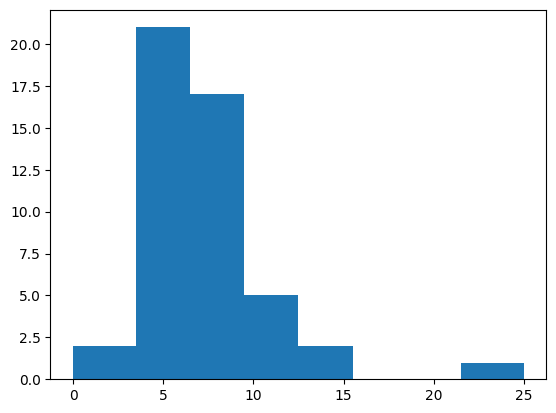

In [17]:
plt.hist(data_undefeatedStreak, [0,3.5,6.5,9.5,12.5,15.5,18.5,21.5,25])
data_undefeatedStreak.describe()

With this new updated data, we have a higher mean and a higher standard deviation. Now we can try again.

If we plot the Weibull formula for standard deviation alongside the one for the mean to get a better idea of good parameters

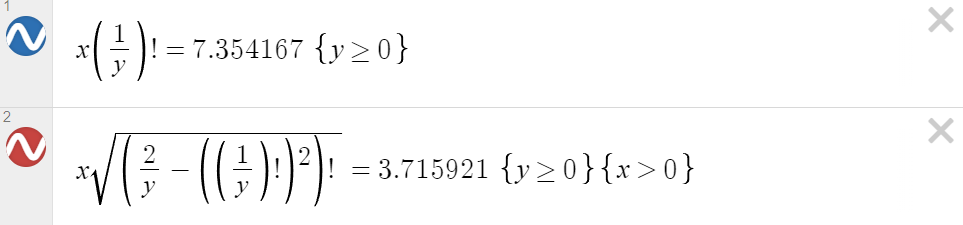



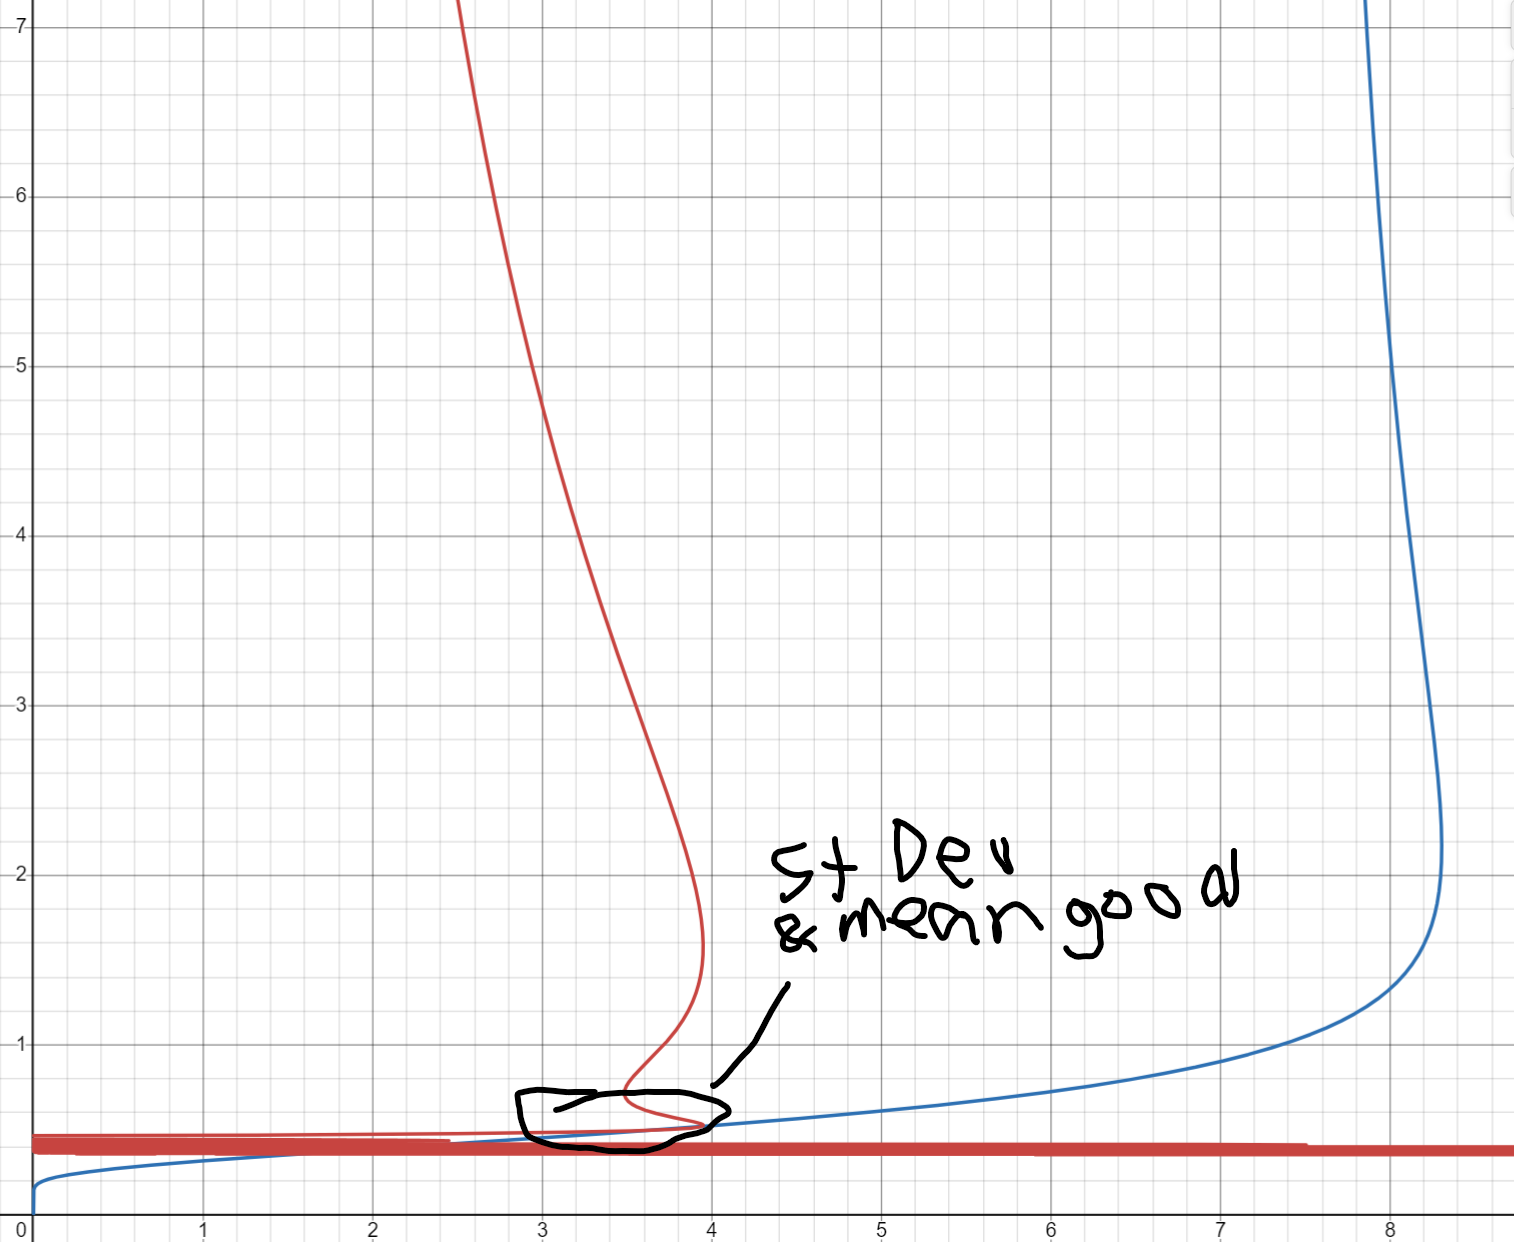

I'm gonna make a more confident truncated normal centered around .5 for my alpha and another truncated normal centered around 3.5 for Beta. Let's see what happens.

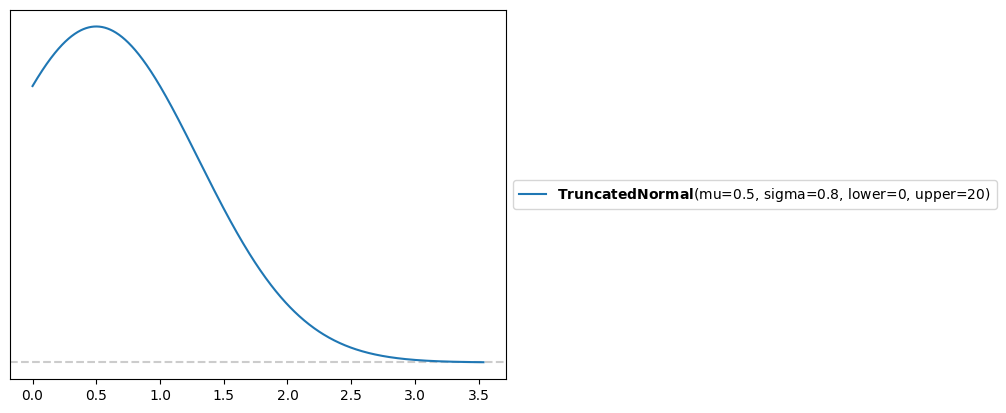

In [18]:
α = pz.TruncatedNormal(.5, .8, 0, 20).plot_pdf()

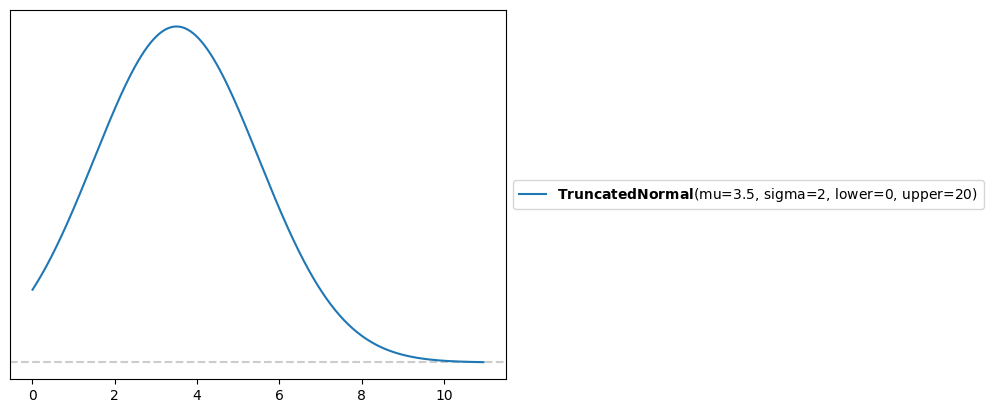

In [19]:
 β = pz.TruncatedNormal(3.5, 2, 0, 20).plot_pdf()

In [20]:
with pm.Model() as model_undefeatedStreak:
    α = pm.TruncatedNormal('α', mu=.5, sigma=.8, lower=0, upper=20) #Alpha Prior
    β = pm.TruncatedNormal('β', mu=3.5, sigma=2, lower=0, upper=20) #Beta Prior
    W = pm.Weibull('W', alpha=α, beta=β, observed=data_undefeatedStreak) #Liikelihood
    idata_undefeatedStreak = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'β'}>],
      dtype=object)

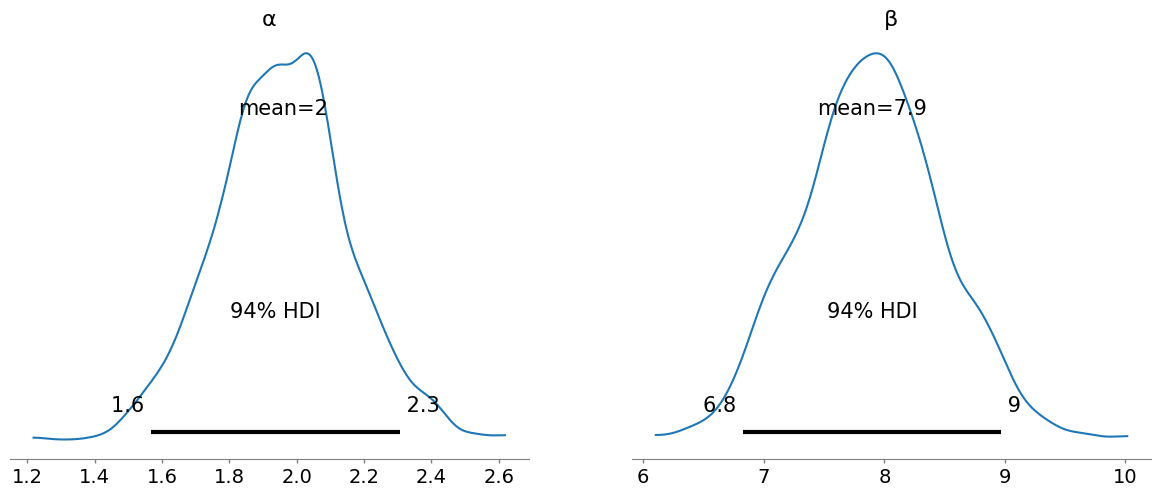

In [21]:
az.plot_posterior(idata_undefeatedStreak)

array([[<Axes: >, None],
       [<Axes: xlabel='α', ylabel='β'>, <Axes: >]], dtype=object)

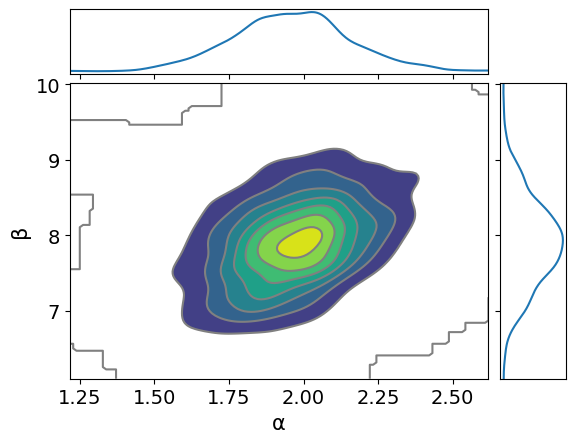

In [22]:
az.plot_pair(idata_undefeatedStreak, kind='kde', marginals=True)

In [23]:
pm.sample_posterior_predictive(idata_undefeatedStreak, model=model_undefeatedStreak, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='W'>

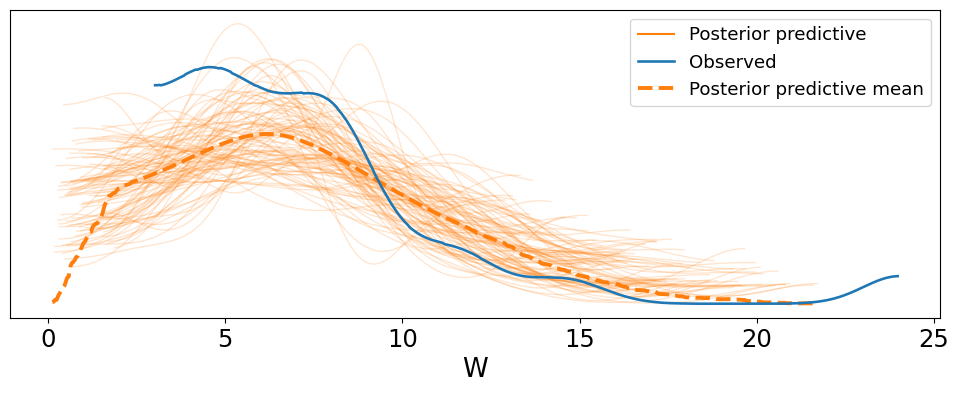

In [24]:
az.plot_ppc(idata_undefeatedStreak, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Ouch, this model still way overpredicts tiny values (0-2), underpredicts small/medium values (3-9) and slightly overpredicts large values. I don't really know why this is. Some other observations are that the model fought pretty hard against my prior again. Both alpha and beta were pretty much on the boundaries of what the prior would allow for. The region I was expecting to find based on the equations was not even plotted on the heat map. The only conclusion I can draw from this is that I don't actually understand how alpha beta effect the weibull distribution or that the Weibull doesn't actually model the situation as well as i thought, so, I'm gonna try something else that's a little more direct.

I want to model the individual teams seperately and have the output be the maximum of "time to failure" of all of the teams in the system. I'm hoping this will model the situation a little better because it will properly capture the idea of the system having failed only after all of its components have. Also, I won't need to account for the idea that teams who last longer are likely better with a weibull distribution anymore, I can instead use an exponential distribution and just have different teams have different lambda values.

Update: I spent a long long time trying to figure out how to make this custom likelihood, but I failed :(. I will go on with a little conclusion.

In hindsight, I don't think that a Weibull distribution was actually the best way to go about this. It can't properly represent how the chance of the highest undefeated win streak being 1 or 2 is literally impossible,and then that chance skyrockets in the subsequent games. The ability to have the failure rate change over time was nice, and probably made it fit the data better than an exponential would, but it still wasn't the best.

For a final little thing lets look at some actual predictions for the next few seasons

In [25]:
stacked_wins_future = az.extract(idata_undefeatedStreak, group="posterior_predictive") #Stacking MCMC chains like in unit 2

In [28]:
stacked_wins_future.sel(sample=0).sel(draw=0).W.to_series().values #Get the W values

array([ 1.96787334,  8.0746742 ,  8.57781848,  7.34796701, 14.50752458,
        7.67951049,  1.36706399,  8.43492624, 10.65446867,  6.13400344,
       11.92411174,  3.31325489,  1.59407806,  9.44070754, 14.49613208,
       14.37663424,  6.31246413,  4.429662  , 11.34177285,  7.33777165,
       13.74425922,  5.88718056,  6.97980189,  7.23865999,  6.31699808,
        8.3448709 ,  1.99052012,  7.20048253,  2.3639401 ,  7.60684894,
        5.18557758,  3.33115475, 10.29461473,  5.60391102,  3.56031106,
        7.96577401,  4.92272755,  7.02756087,  3.56373729,  6.09453687,
        2.13255026,  9.69986281,  1.91059428, 11.05481377,  4.49016572,
        0.58641017,  1.47915074, 11.46522708])

This immediately shows us some of the flaws of this model. If we round to the nearest integer, this model predicts a few seasons where the highest undefeated streak is 1 or 2 games, which is totally unrealistic. The values aren't all unreasonable, but this prediction is definitely far from perfect.

If I was to do this project again, I would prolly choose a different likelihood and make sure to clean my dataset a little more beforehand.